## Prédiction/Classification du Cancer des Seins

Ce projet vise à résoudre un problème concernant une classification des patients ayant le cancer des eins et ceux n'ayant pas le cancer. Un modèle pareil aidera les hôpitaux en terme de decision making sur les nouveaux patients avec les mêmes données cliniques.

## 1. Lecture de données

In [1]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('/home/fouba/Documents/Tech4Tchad/python/MachineLearning/group/Cancer/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [13]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [14]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## 2. Analyse Exploratoire et Visualisation des données

In [15]:
df['diagnosis'].unique()

array([0, 1])

<Axes: >

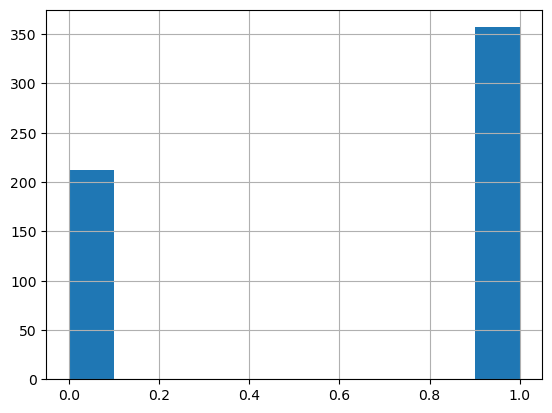

In [16]:
df['diagnosis'].hist()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
# on convertit les features en une liste de columns
columns = df_features.columns.tolist()
columns

NameError: name 'df_features' is not defined

In [11]:
plt.figure(figsize=(16,38))

for i, col in enumerate(columns, 1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color = '#d1aa00', fill = True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout()
plt.show()


NameError: name 'columns' is not defined

<Figure size 1600x3800 with 0 Axes>

In [ ]:
 df.isnull().sum()

In [ ]:
 df.isna().sum()

In [ ]:
df.duplicated()

In [ ]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

In [ ]:

from scipy.stats import zscore


for i in columns:
    y_outliers = df[abs(zscore(df[i])) >= 3 ]
    print('Le nombre des outliers de ',i,'est ',len(y_outliers))
    y_outliers
    


In [ ]:
mean_area = df['mean_area'].unique()
print("=====================Les valeur du feature alcohol==============\n")
print(mean_area)
print("=======================================================================\n")
print('le minimum est',min(mean_area))
print('le maximum est', max(mean_area))


In [ ]:
def status_join(mean_area):
    if mean_area <=700:
        return "Restreinte"
    elif mean_area <=1168:
        return "Un peu Large"
    elif mean_area <= 1614:
        return "Large"
    else:
        return "Très Large"

df['Moyenne_surface'] = df['mean_area'].apply(status_join)
df.sample(frac=1).head(10)

In [ ]:
import numpy as np

plt.figure(figsize=(15,30))

cross = pd.crosstab(index=df['mean_area'],columns=df['status_join'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='crest_r').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% Moyenne de la surface')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("La moyenne de la surface par {}".format('status_join'))
plt.show()